In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from helper_functions import *
from sampling.least_squares_sampler import *
from models.regression_model import *
from models.ld_regression_model import *

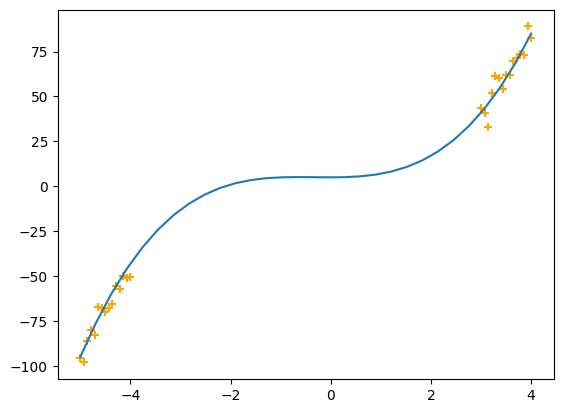

In [18]:
# training data generation
sigma = 5
f = lambda x : x**3 + x**2 + 5
x_test = np.linspace(-5, 4, 30)
y_test = f(x_test)
x_train = np.concatenate((np.linspace(-5, -4, 15), np.linspace(3,4,15)))
y_train = f(x_train) + np.random.normal(0, sigma, len(x_train))
plt.scatter(x_train, y_train, marker='+', color='Orange')
plt.plot(x_test, y_test)
plt.show()

# number of dimensions of basis function
d_dash = 4

# phi function for LR
def phi(x):
	return np.array([1, x, x**2, x**3], dtype=object)

In [19]:
b = 1/sigma**2
model = RegressionModel(x_train, y_train, np.full(len(x_train), b*0.5), np.diag(np.full(d_dash, 0.1)), phi)
ld_model = LDRegressionModel(x_train, y_train, np.full(len(x_train), b*0.5), np.diag(np.full(d_dash, 0.1)), phi)
sampler = LeastSquaresSampler(model, ld_model.mean, 30)
samples = np.zeros((100, 4))
for i in tqdm(range(100)):
	samples[i] = sampler.sample(rate=0.05)

100%|██████████| 100/100 [00:54<00:00,  1.83it/s]


In [20]:
H = ld_model.M + sampler.model.A
test_samples = np.random.multivariate_normal(ld_model.mean, np.linalg.inv(H), size=100)

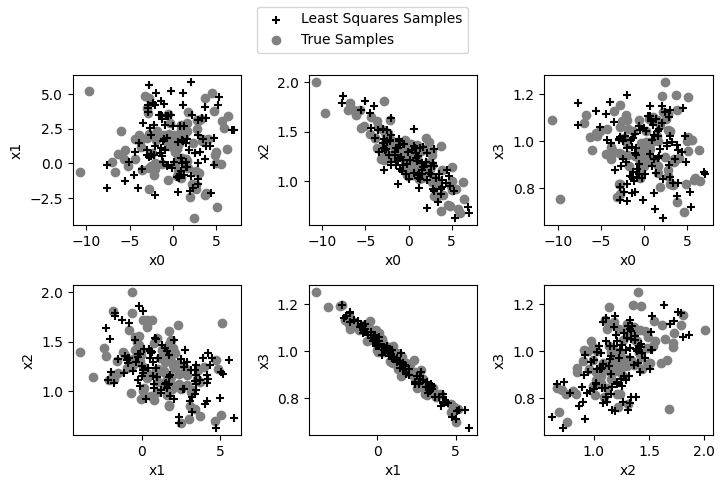

In [21]:
fig, ax = plt.subplots(2,3)
for i in range(4):
    for j in range(i,4):
        if i != j:       
            if i == 0:
                ax[i][j-1].scatter(samples[:,i], samples[:,j], color='Black', marker='+', label="Least Squares Samples")
                ax[i][j-1].scatter(test_samples[:,i], test_samples[:,j], c='Grey', zorder=-1, label="True Samples")
                ax[i][j-1].set_xlabel("x{}".format(i))
                ax[i][j-1].set_ylabel("x{}".format(j))
            else:
                ax[1][i+j-3].scatter(samples[:,i], samples[:,j], color='Black', marker='+',label="Least Squares Samples")
                ax[1][i+j-3].scatter(test_samples[:,i], test_samples[:,j], c='Grey', zorder=-1, label="True Samples")
                ax[1][i+j-3].set_xlabel("x{}".format(i))
                ax[1][i+j-3].set_ylabel("x{}".format(j))
handles, labels = ax[1][2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.1,
                    top=0.85,
                    wspace=0.4,
                    hspace=0.4)

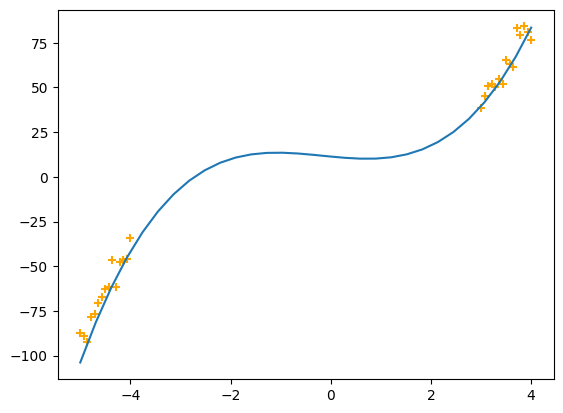

In [16]:
plt.plot(x_test, sample @ phi(x_test))
plt.scatter(x_train, y_train, marker='+', color='Orange')